<a href="https://colab.research.google.com/github/Monica-Lu/AI_ML_Research/blob/main/Tensorflow_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit to Youtube Channel Daniel Bourke, rewrote some parts by myself

# Intro to tensors

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
#Check number of dimensions
scalar.ndim

0

In [ ]:
#Create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
#Check number of dimensions
vector.ndim

1

In [ ]:
matrix = tf.constant([[10,7],
                      [7,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim

2

In [ ]:
#Create another matrix
another_matrix = tf.constant([[10. , 7.],
                              [3. , 2.],
                              [8., 9.]], dtype = tf.float16)
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
another_matrix.ndim

2

In [ ]:
#Create Tensor
tensor = tf.constant([[[1,2,3],[4,5,6]],
                      [[7,8,9], [10,11,12]],
                       [[13,14,15],[16,17,18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim

3

In [ ]:
#Create the same tensor with tf.Variable() as above
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
#Invalid Syntax(Check Tensorflow framework at tensorflow.org)
#changeable_tensor[0] = 7
#changeable_tensor

In [ ]:
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
#Invalid Syntax(Check Tensorflow framework at tensorflow.org)
#unchangeable_tensor[0].assign(7)
#unchangeable_tensor

If in doubt use `tf.constant` and change later if needed

# Create Random Tensors

Random tensors are tensors of some arbitrary size which contain random number

In [ ]:
#Create two random tensors
random_1 = tf.random.Generator.from_seed(7) # set seed for reproducibility
random_1 = random_1.normal(shape=(3,2))
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3,2))

#Are they equal
random_1, random_2, random_1 == random_2


(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-1.3240396 ,  0.28785667],
        [-0.8757901 , -0.08857018],
        [ 0.69211644,  0.84215707]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[False, False],
        [False, False],
        [False, False]])>)

In [ ]:
#Shuffle tensor
tf.random.set_seed(42) #global seed
not_shuffled = tf.constant([[10,7],
                            [8,9],
                            [2,3]], )
tf.random.shuffle(not_shuffled, seed = 32) #operational seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  3],
       [10,  7],
       [ 8,  9]], dtype=int32)>

Not global and Not operation -> random seed

global and not operation -> unique random sequence

operation and not global -> default global and specified operation determines random seq

global and operation -> both determines random seq

In [ ]:
tf.random.shuffle(not_shuffled, seed=32)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  3],
       [ 8,  9],
       [10,  7]], dtype=int32)>

In [ ]:
#Other way to make tensors

#Create a tensor of all ones
tf.ones([10,7])

#Create a tensor of all zeros
tf.zeros(shape=(3,4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [ ]:
import numpy as np
numpy_1 = np.arange(1,25, dtype = np.int32)
numpy_1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
A = tf.constant(numpy_1, shape=(2,3,4)) #shape has to match array length
B = tf.constant(numpy_1)
A, B

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

#Getting info from tensors

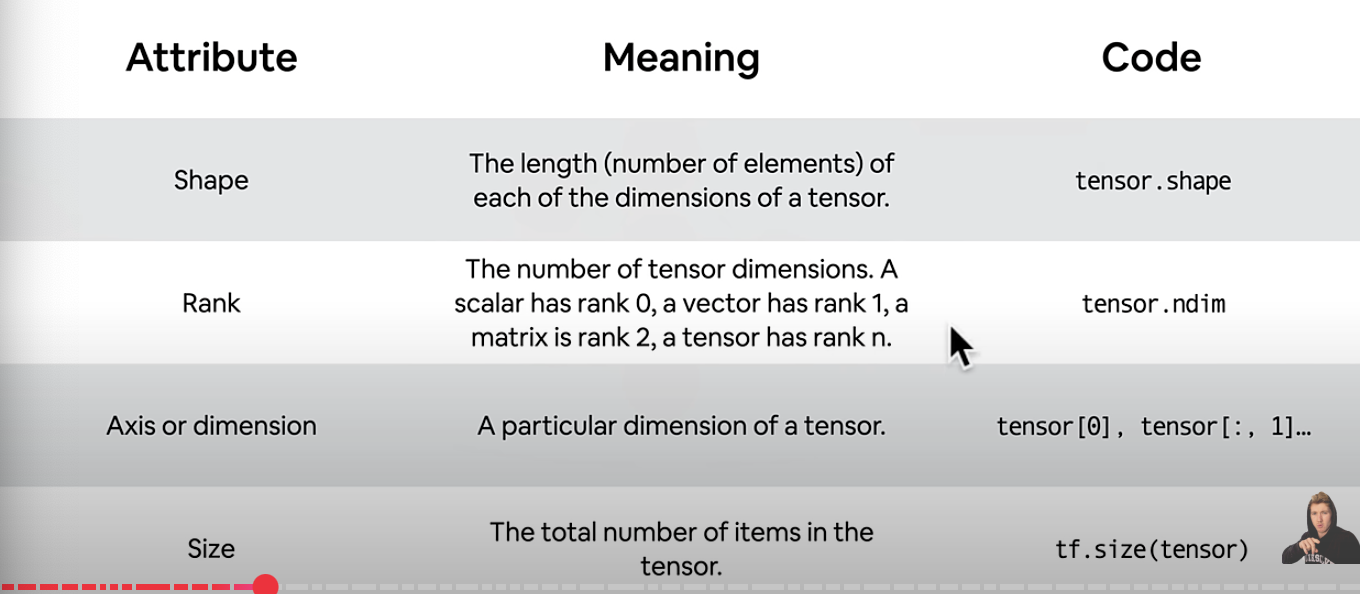

In [ ]:
rank_tensor = tf.ones(shape=[2,3,4,5])
rank_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]],


       [[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]]], dtype=float32)>

In [ ]:
#indexing
rank_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]], dtype=float32)>

In [ ]:
rank_tensor.shape, rank_tensor.ndim, tf.size(rank_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
#Get various attributes of our tensors
print("Datatype of every element:", rank_tensor.dtype)
print("Number of dimensions (rank):", rank_tensor.ndim)
print("Shape of tensor:", rank_tensor.shape)
print("Elements along axis 0 of tensor:", rank_tensor.shape[0])
print("Elements along last axis of tensor:", rank_tensor.shape[-1])
print("Total number of elements:", tf.size(rank_tensor))
print("Total number of elements:", tf.size(rank_tensor).numpy())

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along axis 0 of tensor: 2
Elements along last axis of tensor: 5
Total number of elements: tf.Tensor(120, shape=(), dtype=int32)
Total number of elements: 120


#Index Tensors

In [ ]:
rank_tensor[:2, :1, :2, :1]

<tf.Tensor: shape=(2, 1, 2, 1), dtype=float32, numpy=
array([[[[1.],
         [1.]]],


       [[[1.],
         [1.]]]], dtype=float32)>

In [ ]:
#Get the first element from each dim from each index except for the final one
rank_tensor[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[1., 1., 1., 1., 1.]]]], dtype=float32)>

In [ ]:
rank_2_tensor = tf.constant([[10,7],
                            [1,2]])
rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [ ]:
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 1,  2]], dtype=int32)>

In [ ]:
# Get the last item of each of row of our tensor
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 2], dtype=int32)>

In [ ]:
#Add in extra dimension to our tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis] #same as [: , :] in this case
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 1],
        [ 2]]], dtype=int32)>

In [ ]:
#Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) #-1 means expand the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 1],
        [ 2]]], dtype=int32)>

In [ ]:
tf.expand_dims(rank_2_tensor,axis=0) #expand the 0-axis

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 1,  2]]], dtype=int32)>

In [ ]:
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 1,  2]], dtype=int32)>

#Manipulating tensors

In [ ]:
tensor = tf.constant([[10, 7], [2,3]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [12, 13]], dtype=int32)>

In [ ]:
tensor = tensor + 10
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [12, 13]], dtype=int32)>

#Matrix Multiplication

In [ ]:
print(tensor)
tf.matmul(tensor, tensor) #not the same as tensor * tensor(which squares the org matrix)
tensor @ tensor #same as matmul

tf.Tensor(
[[20 17]
 [12 13]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[604, 561],
       [396, 373]], dtype=int32)>

In [ ]:
#Change the shape of tensor
tf.reshape(tensor, shape=(4,1))

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[20],
       [17],
       [12],
       [13]], dtype=int32)>

In [ ]:
#Match dimensions for matmul
tf.reshape(tensor, shape= (1,4)) @ tf.reshape(tensor, shape=(4,1))

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[1002]], dtype=int32)>

In [ ]:
#transpose
tf.transpose(tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 12],
       [17, 13]], dtype=int32)>

In [ ]:
#dot product
tf.matmul(tensor, tf.transpose(tensor))
tf.tensordot(tf.transpose(tensor), tensor, axes = 1)
tf.matmul(tensor, tf.reshape(not_shuffled,shape = (2,3)))
tensor @ tf.transpose(tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[689, 461],
       [461, 313]], dtype=int32)>

In [ ]:
print("Normal tensor")
print(tensor, "\n")

print("tensor reshaped to (2,3):")
print(tf.reshape(not_shuffled, shape=(2,3)))

print("tensor transposed")
print(tf.transpose(tensor))

Normal tensor
tf.Tensor(
[[20 17]
 [12 13]], shape=(2, 2), dtype=int32) 

tensor reshaped to (2,3):
tf.Tensor(
[[10  7  8]
 [ 9  2  3]], shape=(2, 3), dtype=int32)
tensor transposed
tf.Tensor(
[[20 12]
 [17 13]], shape=(2, 2), dtype=int32)


#Change datatype of tensor

In [ ]:
#Create a new tensor w default datatype
B = tf.constant([1.3, 5.6])
B.dtype

tf.float32

In [ ]:
C = tf.constant([1, 3])
C.dtype

tf.int32

In [ ]:
#Change from float32 to float16 (half-prec)
D = tf.cast(B, dtype = tf.float16)
D

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.3, 5.6], dtype=float16)>

In [ ]:
#Change from int32 to float32
E = tf.cast(C, dtype = tf.float32)
E

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 3.], dtype=float32)>

#Aggregate tensors

Aggregate tensors = condensing them from multiple values down to a smaller amount of values

In [ ]:
D = tf.constant([-7,-10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [ ]:
# Get the abs value
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

In [ ]:
#Create a random tensor w values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0,100, size =50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([52, 83, 52, 56, 25, 35, 12, 27,  4, 57, 53, 18, 63, 51, 53,  4, 11,
       62, 54, 25, 83, 41, 47, 36, 31, 56, 83, 35, 55, 13, 36, 99,  3, 83,
       66, 30, 35, 87, 20, 91, 28, 19, 19, 58, 96, 66, 63, 62, 65, 89])>

In [ ]:
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [ ]:
#Find min
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=3>

In [ ]:
#Find max
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=99>

In [ ]:
#Find mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=47>

In [ ]:
#Find sum
tf.reduce_sum(E)

In [ ]:
#Find variance
import tensorflow_probability as tfp
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=673>

In [ ]:
#Find std dev
tf.math.reduce_std(tf.cast(E, dtype = tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=25.934040069580078>

In [ ]:
#Create a new random tensor
tf.random.set_seed(42)
F = tf.random.uniform(shape = [50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [ ]:
#Find positional max and min
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [ ]:
#index of our largest value position
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.967138409614563>

In [ ]:
#Find the max value of F
tf.reduce_max(F)

In [ ]:
#Check for equality
assert F[tf.argmax(F)] == tf.reduce_max(F)
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [ ]:
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463667869567871>

In [ ]:
tf.reduce_min(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463667869567871>

In [ ]:
assert F[tf.argmin(F)] == tf.reduce_min(F)
F[tf.argmin(F)] == tf.reduce_min(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

Squeezing a tensor(remove all single dim)

In [ ]:
G = tf.constant(tf.random.uniform(shape = [50]), shape = (1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.7402308 , 0.33938193, 0.5692506 , 0.44811392, 0.29285502,
           0.4260056 , 0.62890387, 0.691061  , 0.30925727, 0.89236605,
           0.66396606, 0.30541587, 0.8724164 , 0.1025728 , 0.56819403,
           0.25427842, 0.7253866 , 0.4770788 , 0.46289814, 0.88944995,
           0.6792555 , 0.09752727, 0.01609659, 0.4876021 , 0.5832968 ,
           0.41212583, 0.731905  , 0.93418944, 0.5298122 , 0.9664817 ,
           0.88391197, 0.10578597, 0.44439578, 0.7851516 , 0.47332513,
           0.89893615, 0.04290593, 0.8717004 , 0.6068529 , 0.12963045,
           0.4527359 , 0.24573493, 0.34777248, 0.582147  , 0.82298195,
           0.82862926, 0.877372  , 0.5319803 , 0.03594303, 0.03986669]]]]],
      dtype=float32)>

In [ ]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [ ]:
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.7402308 , 0.33938193, 0.5692506 , 0.44811392, 0.29285502,
        0.4260056 , 0.62890387, 0.691061  , 0.30925727, 0.89236605,
        0.66396606, 0.30541587, 0.8724164 , 0.1025728 , 0.56819403,
        0.25427842, 0.7253866 , 0.4770788 , 0.46289814, 0.88944995,
        0.6792555 , 0.09752727, 0.01609659, 0.4876021 , 0.5832968 ,
        0.41212583, 0.731905  , 0.93418944, 0.5298122 , 0.9664817 ,
        0.88391197, 0.10578597, 0.44439578, 0.7851516 , 0.47332513,
        0.89893615, 0.04290593, 0.8717004 , 0.6068529 , 0.12963045,
        0.4527359 , 0.24573493, 0.34777248, 0.582147  , 0.82298195,
        0.82862926, 0.877372  , 0.5319803 , 0.03594303, 0.03986669],
       dtype=float32)>,
 TensorShape([50]))

##One-hot encoding tensors

In [ ]:
# Create a list of indices
some_list = [0,1,2,3]

#One hot encode our list of indices
tf.one_hot(some_list, depth = 4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [ ]:
#Specify custom values for one hot encoding
tf.one_hot(some_list, depth = 4, on_value="lol", off_value="haha")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'lol', b'haha', b'haha', b'haha'],
       [b'haha', b'lol', b'haha', b'haha'],
       [b'haha', b'haha', b'lol', b'haha'],
       [b'haha', b'haha', b'haha', b'lol']], dtype=object)>

In [ ]:
# Square, log, sqrt
H = tf.range(1, 16)
H

<tf.Tensor: shape=(15,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int32)>

In [ ]:
tf.square(H)

<tf.Tensor: shape=(15,), dtype=int32, numpy=
array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144, 169,
       196, 225], dtype=int32)>

In [ ]:
tf.sqrt(tf.cast(H, dtype = tf.float32))

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       , 3.1622777, 3.3166249, 3.4641016,
       3.6055512, 3.7416575, 3.8729835], dtype=float32)>

In [ ]:
tf.math.log(tf.cast(H, dtype = tf.float32))

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246, 2.3025851, 2.3978953, 2.4849067,
       2.5649493, 2.6390574, 2.7080503], dtype=float32)>

In [ ]:
#Tensor and Numpy

#Create a tensor directly from a numpy array
J = tf.constant(np.array([3., 7., 10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [ ]:
#Convert our tensor back to numpy array
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:
#Convert tensor J to numpy array
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:
J = tf.constant([3.])
J.numpy()[0]

np.float32(3.0)

In [ ]:
#default types of each are slightly diff
numpy_J = tf.constant(np.array([3. ,7., 10.]))
tensor_J = tf.constant([3., 7., 10.])
#check the datatype of each
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)